In [382]:
library(MAESTRO)
library(Seurat)
library(Signac)
library(rhdf5)
library(harmony)
library(qs)

qs v0.25.1.



In [101]:
# H3K4me1_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/H3K27ac_H3K4me1_bam/H3K4me1_merge_filtered'
# H3K27ac_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/H3K27ac_H3K4me1_bam/H3K27ac_merge_filtered'

# ATAC

process the ATAC dataset from peak count matrix, h5 file downloaded from https://www.10xgenomics.com/resources/datasets/fresh-cortex-from-adult-mouse-brain-p-50-1-standard-1-2-0

In [394]:
ATAC_10x_h5_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/10X/10X_mouse_brain/atac_v1_adult_brain_fresh_5k_filtered_peak_bc_matrix.h5'
ATAC_data = Read10X_h5(ATAC_10x_h5_path)

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


In [ ]:
rownames(ATAC_data)

In [395]:
ATAC.res <- ATACRunSeurat(inputMat = ATAC_data,
                                 project = "ATAC",
                                 min.c = 50,
                                 min.p = 500,
                                 method = "LSI",
                                 dims.use = 1:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = "example//histone//peak_base//10X/ATAC_analysis/")

LSI analysis ...

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

UMAP analysis ...

15:26:15 UMAP embedding parameters a = 0.9922 b = 1.112

15:26:15 Read 3814 rows and found 30 numeric columns

15:26:15 Using Annoy for neighbor search, n_neighbors = 30

15:26:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:26:15 Writing NN index file to temp file /tmp/RtmphIeEiC/file3e3ae337a662cd

15:26:15 Searching Annoy index using 1 thread, search_k = 3000

15:26:16 Annoy recall = 100%

15:26:18 Commencing smooth kNN distance calibration using 1 thread

15:26:20 Initializing from normalized Laplacian + noise

15:26:20 Commencing optimization for 500 epochs, with 141004 positive edges

15:26:25 Optimization finished

Warning message:
"The following arg

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3814
Number of edges: 100790

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9238
Number of communities: 16
Elapsed time: 0 seconds


Identify cluster specific peaks ...



In [22]:
ATAC_SE <- as.SingleCellExperiment(ATAC.res$ATAC)

saveRDS(ATAC_SE, "example//histone//peak_base//10X/ATAC_analysis/ATAC_SE.rds")

In [381]:
ATAC_rp <- ATACCalculateGenescore(ATAC_data,
                                  project = "ATAC",
                                  organism = "GRCm38",
                                  decaydistance = 100000,
                                  model = "Simple")

In [383]:
qsave(ATAC_rp, "example//histone//peak_base//10X/ATAC_analysis/ATAC_RP_100k.qs")

In [384]:
ATAC.res$ATAC <- ATACAttachGenescore(ATAC.res$ATAC,ATAC_rp)

Centering and scaling data matrix



In [387]:
# Annotation
data(mouse.brain.ALLEN)
ATAC.res$ATAC <- ATACAnnotateCelltype(ATAC = ATAC.res$ATAC,
                                     signatures = mouse.brain.ALLEN,
                                     min.score = 0.1,
                                     genes.test.use = "presto",
                                     genes.cutoff = 1E-5,
                                     outdir = "example//histone//peak_base//10X/ATAC_analysis/")

Identify cluster specific genes based on RP score ...



In [388]:
ATAC.res$ATAC

An object of class Seurat 
195335 features across 3814 samples within 2 assays 
Active assay: ACTIVITY (26214 features, 2000 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: lsi, umap

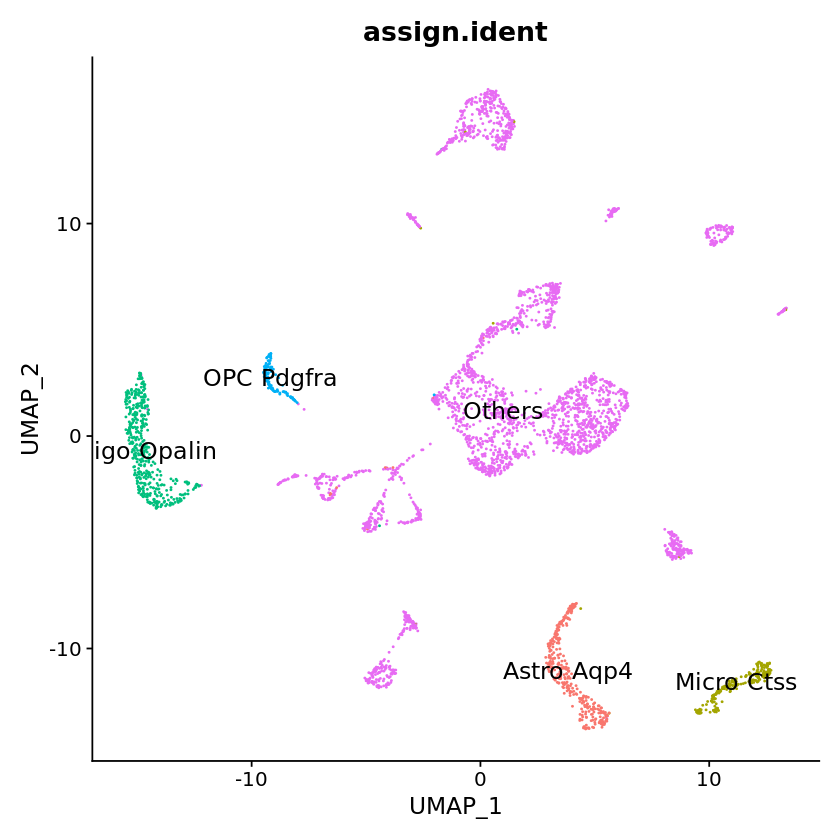

In [390]:
p <- DimPlot(object = ATAC.res$ATAC, label = TRUE, pt.size = 0.15, group.by = "assign.ident", label.size = 5) + NoLegend()
p

In [391]:
write.table(ATAC.res$ATAC@meta.data, "example/histone/peak_base/10X/ATAC_analysis/ATAC_meta_data_100k_rp.txt", sep = '\t', quote = FALSE)

In [392]:
qsave(ATAC.res$ATAC, "example/histone/peak_base/10X/ATAC_analysis/ATAC_seurat.qs")

## imputation result

In [484]:
# ATAC_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/ATAC_bam/Access_merge_filtered'
# ATAC_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/data/ATAC/AdultCTX_DNA_ATAC_peaks_final.txt_mtx/'
# ATAC_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/data/ATAC/Adult_Cerebrail_Cortex/Adult_CTX_DNA'
# ATAC_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/10X/SCRIPT/imputation/mtx_imputed_H3K4me1'
# ATAC_10x_mtx_path = '/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/10X/SCRIPT/imputation_0924/imputed_H3K27ac_mtx/'
ATAC_10x_mtx_path = 'example/histone/peak_base/10X/SCRIPT/imputation_AST_OPC_MOL/imputed_H3K27ac_mtx/'
imputed_count = Read10X(ATAC_10x_mtx_path, gene.column = 1)

In [ ]:
rownames(imputed_count)

In [490]:
dim(imputed_count)

[1] 14294   917

In [486]:
imputed_res <- ATACRunSeurat(inputMat = imputed_count,
                                 project = "ATAC",
                                 min.c = 10,
                                 min.p = 200,
                                 method = "LSI",
                                 dims.use = 1:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = "example//histone//peak_base//10X/SCRIPT/impute_ATAC_analysis_H3K27ac/")

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
LSI analysis ...

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

UMAP analysis ...

22:17:46 UMAP embedding parameters a = 0.9922 b = 1.112

22:17:46 Read 917 rows and found 30 numeric columns

22:17:46 Using Annoy for neighbor search, n_neighbors = 30

22:17:46 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:17:46 Writing NN index file to temp file /tmp/RtmphIeEiC/file3e3ae359f53c8b

22:17:46 Searching Annoy index using 1 thread, search_k = 3000

22:17:47 Annoy recall = 100%

22:17:48 Commencing smooth kNN distance calibration using 1 thread

22:17:52 Initializing from normalized Laplacian + noise

22:17:52 Commencing optimization for 500 epochs, with

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 917
Number of edges: 31307

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8079
Number of communities: 6
Elapsed time: 0 seconds


Identify cluster specific peaks ...



In [ ]:
metadata <- read.csv('example/histone/peak_base/10X/ATAC_analysis/metadata.txt', row.names = 1)

In [503]:
imputed_res$ATAC@meta.data$assign.ident <- metadata[rownames(imputed_res$ATAC@meta.data),'Annotation']

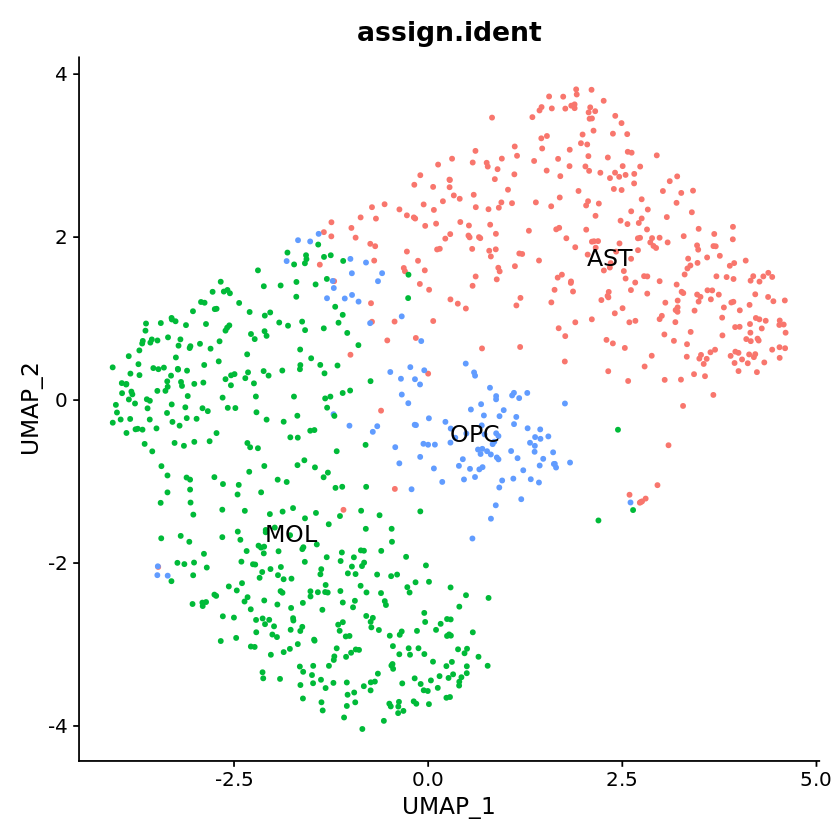

In [508]:
DimPlot(object = imputed_res$ATAC, label = TRUE, group.by = "assign.ident", label.size = 5) + NoLegend()

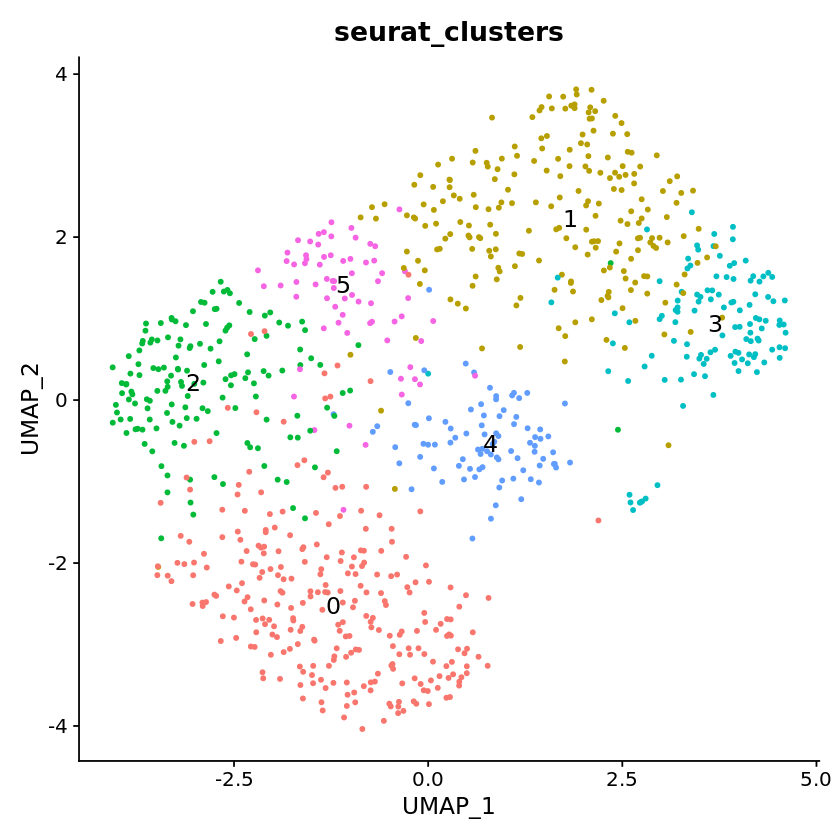

In [506]:
DimPlot(object = imputed_res$ATAC, label = TRUE, group.by = "seurat_clusters", label.size = 5) + NoLegend()

In [509]:
library(reticulate)
use_python("/fs/home/dongxin/Applications/miniconda3/envs/MAESTRO/bin/python", required = TRUE)

impute.brain.gene <- ATACCalculateGenescore(imputed_count, organism = "GRCm38", decaydistance = 100000, model = 'Simple')
imputed_res$ATAC <- ATACAttachGenescore(ATAC = imputed_res$ATAC, RPmatrix = impute.brain.gene)

Centering and scaling data matrix



In [510]:
imputed_res$ATAC@assays$ACTIVITY

Assay data with 26214 features for 917 cells
Top 10 variable features:
 Gm41096, BC030500, Galntl6, Sgcd, Gm20879, Mnd1-ps, Tlr4,
4930533P14Rik, Slco4c1, Panct2 

In [ ]:
DimPlot(object = imputed_res$ATAC, label = TRUE, pt.size = 0.15, group.by = "seurat_clusters", label.size = 3) + NoLegend()

## real H3K27ac

In [402]:
#real 10x h5
H3K27ac_real <- readRDS('/fs/home/dongxin/Projects/SCRIPT/scATAC/example/histone/peak_base/GSE157637_mouse_brain/H3K27ac_seurat_object.Rds')

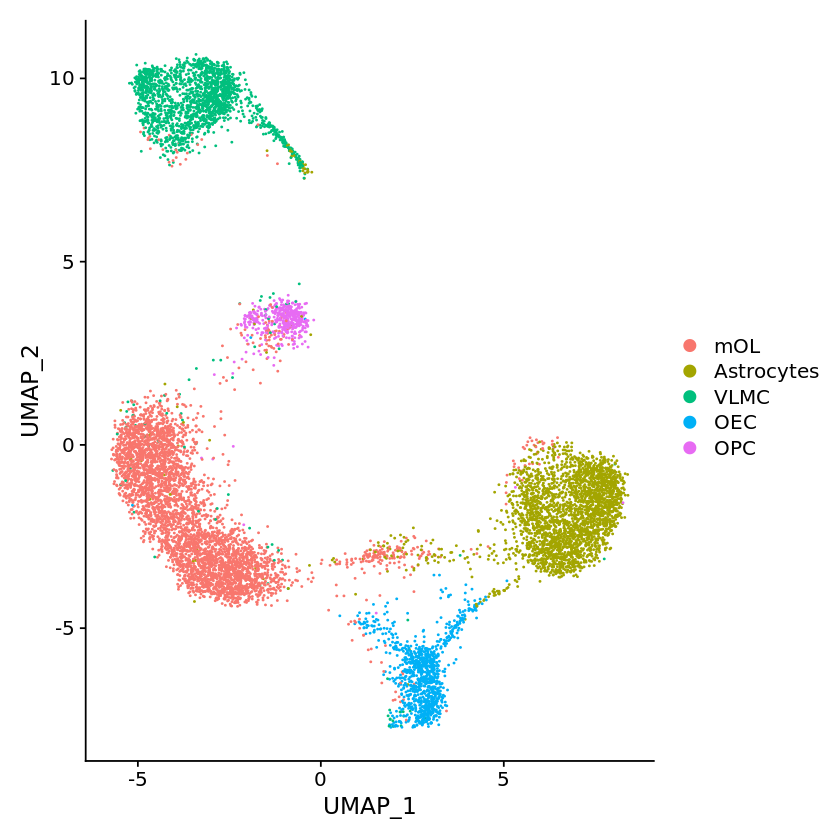

In [403]:
DimPlot(H3K27ac_real)

In [412]:
cell_bc <- rownames(H3K27ac_real@meta.data)

In [478]:
AST_bc <- cell_bc[which(H3K27ac_real@meta.data['cell_type'] == 'Astrocytes')]
MOL_bc <- cell_bc[which(H3K27ac_real@meta.data['cell_type'] == 'mOL')]
OPC_bc <- cell_bc[which(H3K27ac_real@meta.data['cell_type'] == 'OPC')]
sub_bc <- c(AST_bc, MOL_bc, OPC_bc)

In [404]:
real_count = H3K27ac_real@assays$peaks@counts

In [479]:
sub_count <- real_count[,sub_bc]

In [480]:
real_assay <- CreateSeuratObject(counts = sub_count, project = "H3K27ac", min.cells = 10, min.features = 500, assay = 'peaks')
real_assay

An object of class Seurat 
42532 features across 1940 samples within 1 assay 
Active assay: peaks (42532 features, 0 variable features)

In [481]:
real_assay_res <- ATACRunSeurat(inputMat = sub_count,
                                 project = "H3K27ac",
                                 min.c = 10,
                                 min.p = 200,
                                 method = "LSI",
                                 dims.use = 1:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = "example//histone//peak_base//GSE157637_mouse_brain/real_H3K27ac/")

LSI analysis ...

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

UMAP analysis ...

22:11:16 UMAP embedding parameters a = 0.9922 b = 1.112

22:11:16 Read 3869 rows and found 30 numeric columns

22:11:16 Using Annoy for neighbor search, n_neighbors = 30

22:11:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:11:17 Writing NN index file to temp file /tmp/RtmphIeEiC/file3e3ae359a5a54f

22:11:17 Searching Annoy index using 1 thread, search_k = 3000

22:11:18 Annoy recall = 100%

22:11:20 Commencing smooth kNN distance calibration using 1 thread

22:11:23 Initializing from normalized Laplacian + noise

22:11:23 Commencing optimization for 500 epochs, with 166406 positive edges

22:11:29 Optimization finished

Warning message:
"The following arg

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3869
Number of edges: 128253

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7913
Number of communities: 8
Elapsed time: 0 seconds


Identify cluster specific peaks ...



In [482]:
real_assay_res$ATAC@meta.data$assign.ident <- H3K27ac_real@meta.data[rownames(real_assay_res$ATAC@meta.data),'cell_type']

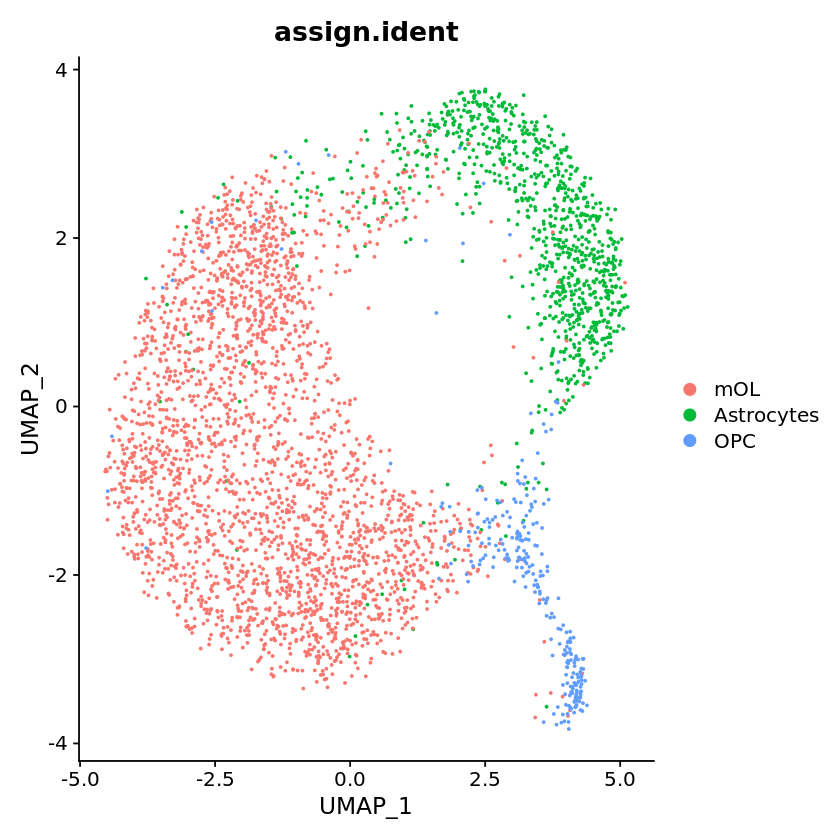

In [483]:
DimPlot(real_assay_res$ATAC, group.by = 'assign.ident')

In [ ]:
library(reticulate)
use_python("/fs/home/dongxin/Applications/miniconda3/envs/MAESTRO/bin/python", required = TRUE)

real.brain.gene <- ATACCalculateGenescore(real_count, organism = "GRCm38", decaydistance = 100000, model = 'Simple')
real_assay_res$ATAC <- ATACAttachGenescore(ATAC = real_assay_res$ATAC, RPmatrix = real.brain.gene)

In [1]:
real_assay_res$ATAC@assays$ACTIVITY

ERROR: Error in eval(expr, envir, enclos): object 'real_assay_res' not found


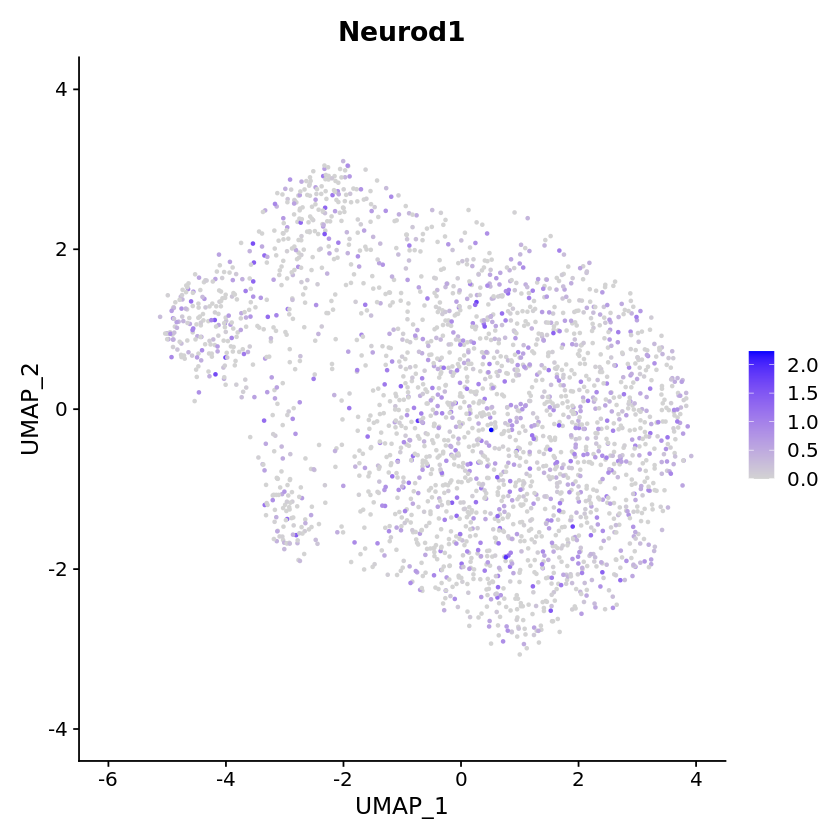

In [339]:
FeaturePlot(real_assay_res$ATAC, 'Neurod1')

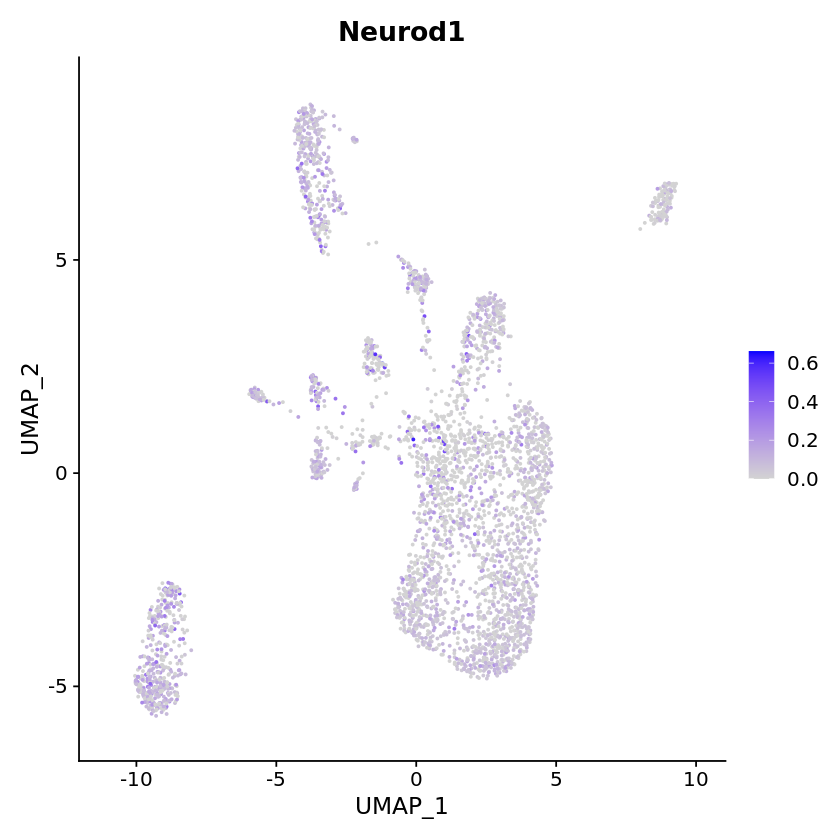

In [372]:
FeaturePlot(imputed_res$ATAC, 'Neurod1')

## integration

In [343]:
REAL <- real_assay_res$ATAC
IMPUTE <- imputed_res$ATAC

In [344]:
REAL$tech <- "real"
IMPUTE$tech <- "impute"

In [345]:
transfer.anchors <- FindTransferAnchors(reference = REAL, query = IMPUTE, features = VariableFeatures(object = REAL), 
                      reference.assay = "ACTIVITY", query.assay = "ACTIVITY", reduction = "cca")

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 4491 anchors

Filtering anchors

	Retained 2189 anchors



In [361]:
transfer.anchors

An AnchorSet object containing 2189 anchors between the reference and query Seurat objects. 
 This can be used as input to TransferData.

In [346]:
celltype.predictions <- TransferData(anchorset = transfer.anchors, refdata = REAL$assign.ident, weight.reduction = IMPUTE[["lsi"]], dims = 1:30)

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [347]:
IMPUTE@meta.data$assign.ident <- celltype.predictions$predicted.id
IMPUTE@meta.data$prediction.score.max <- celltype.predictions$prediction.score.max

In [348]:
genes.use <- VariableFeatures(REAL)

In [349]:
genes.use

[1] "Gm20879"        "Gm20901"        "Spertl"         "Olfr52"        
   [5] "Olfr1045"       "Olfr1044"       "Olfr1043"       "Olfr1046"      
   [9] "Olfr1042"       "Olfr1047"       "Olfr1040"       "Olfr1048"      
  [13] "Olfr1049"       "Olfr1039"       "Olfr1051"       "Olfr1038-ps"   
  [17] "Olfr1052"       "Olfr1053"       "Epha6"          "Mir504"        
  [21] "Olfr1054"       "Cbln2"          "Olfr1055"       "Cdh18"         
  [25] "Olfr1056"       "Fgf13"          "Gm5941"         "Gm14305"       
  [29] "Zfp973"         "Gm2007"         "Gm14308"        "Gm14430"       
  [33] "Gm14434"        "Gm2026"         "Gm4724"         "Gm5524"        
  [37] "Pou3f4"         "Olfr1037"       "Olfr1057"       "Ldoc1"         
  [41] "4930558G05Rik"  "Olfr1058"       "Gm7134"         "Sult1d1"       
  [45] "Dcaf12l1"       "Pabpc4l"        "Neto1"          "Prr32"         
  [49] "Olfr1036"       "Lor"            "Eda2r"          "Sult1e1"       
  [53] "Tfap2b"         "Olfr1061"       "Mir6389"        "Mir3969"       
  [57] "Olfr1062"       "Prr9"           "Gabrb3"         "Gm14295"       
  [61] "Mir509"         "Lelp1"          "Sult1b1"        "Pcdh20"        
  [65] "Lpar4"          "Pglyrp3"        "Ear10"          "Galnt13"       
  [69] "Gabra5"         "Olfr1065"       "Rps6ka6"        "Mir547"        
  [73] "Mir201"         "Olfr1066"       "Itm2a"          "Epha3"         
  [77] "Zfp804a"        "Sprr2a1"        "Sprr2a2"        "Zik1"          
  [81] "Ang6"           "Khdrbs2"        "Ang3"           "Ang5"          
  [85] "Olfr228"        "Olfr1034"       "Sprr2a3"        "Dok6"          
  [89] "A430085M09Rik"  "Slitrk6"        "Lrfn5"          "Gm20063"       
  [93] "Sprr2b"         "Olfr1076"       "Eif2s3y"        "Ear1"          
  [97] "Ugt2a1"         "Unc5d"          "Gm15825"        "Tfap2d"        
 [101] "Vmn1r68"        "4933436I01Rik"  "Elavl2"         "Mageb18"       
 [105] "Mir6402"        "2610002M06Rik"  "Tent5d"         "Ugt2a2"        
 [109] "Olfr1077-ps1"   "Sprr2d"         "Vmn1r67"        "Tmem47"        
 [113] "Olfr1079"       "Vwc2"           "Sprr2e"         "Gm16087"       
 [117] "Csn1s1"         "Nkain3"         "Tusc1"          "Olfr1080"      
 [121] "Hdx"            "Dcaf12l2"       "Sprr2f"         "3100003L05Rik" 
 [125] "Sprr2g"         "Mir3964"        "Prr16"          "Gm6455"        
 [129] "Alg13"          "Ddx3y"          "Vmn2r22"        "Gm3667"        
 [133] "Sprr2h"         "Vmn1r69"        "Fgf10"          "Esp23"         
 [137] "Esp24"          "Adcyap1"        "Gm5795"         "Olfr1033"      
 [141] "Uty"            "Ear2"           "Ear12"          "Ear3"          
 [145] "Gm16506"        "4930550L24Rik"  "Foxp2"          "Olfr1082"      
 [149] "Mgat4c"         "2610042L04Rik"  "Sprr2i"         "Sstr1"         
 [153] "Gpc4"           "Dpp10"          "Sprr2j-ps"      "Gm14410"       
 [157] "Gpr174"         "Sprr1b"         "Sprr2k"         "Msc"           
 [161] "Sprr3"          "Gm3327"         "Kcnip4"         "Gm12371"       
 [165] "Rprm"           "Hcn1"           "Ctsc"           "Kdm5d"         
 [169] "Gm13470"        "Gm8165"         "Casp12"         "Vmn2r23"       
 [173] "Gm14405"        "Gabra1"         "Gm21083"        "Crisp4"        
 [177] "Csn2"           "Prrg1"          "Gm5796"         "Olfr1084"      
 [181] "Gm21190"        "Mir6379"        "A130030D18Rik"  "Speer4d"       
 [185] "Vmn1r70"        "Hnrnpa1l2-ps2"  "Clstn2"         "4930545E07Rik" 
 [189] "Olfr1032"       "Gm21149"        "Sox11"          "Mir680-2"      
 [193] "Tspy-ps"        "Nrg3"           "Antxr2"         "LOC432842"     
 [197] "Gm19782"        "Kcnj3"          "Esp31"          "Olfr1085"      
 [201] "Zfp317"         "Gm9962"         "Gabrg3"         "Cntn5"         
 [205] "Gm27217"        "Kcnh8"          "Etaa1"          "Etaa1os"       
 [209] "Sema3a"         "Sprr1a"         "Sema3c"         "Ugt2b38"       
 [213] "Mir222"         "Gm9

In [359]:
length(which(VariableFeatures(IMPUTE) %in% VariableFeatures(REAL) == TRUE))

[1] 718

In [350]:
refdata <- GetAssayData(REAL, assay = "ACTIVITY", slot = "data")[genes.use, ]

In [351]:
imputation <- TransferData(anchorset = transfer.anchors, refdata = refdata, weight.reduction = IMPUTE[["lsi"]], dims = 1:30)

Finding integration vectors

Finding integration vector weights

Transfering 2000 features onto reference data



In [352]:
IMPUTE[["real"]] <- imputation

In [353]:
CombinedObj <- merge(x = REAL, y = IMPUTE)

In [354]:
CombinedObj@project.name <- 'imputation_integration'
CombinedObj <- ScaleData(CombinedObj, features = genes.use, do.scale = FALSE)
CombinedObj <- RunPCA(CombinedObj, features = genes.use, verbose = FALSE)
CombinedObj <- RunUMAP(CombinedObj, dims = 1:30)

Centering data matrix

20:27:54 UMAP embedding parameters a = 0.9922 b = 1.112

20:27:54 Read 6185 rows and found 30 numeric columns

20:27:54 Using Annoy for neighbor search, n_neighbors = 30

20:27:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

20:27:55 Writing NN index file to temp file /tmp/RtmphIeEiC/file3e3ae3355a352a

20:27:55 Searching Annoy index using 1 thread, search_k = 3000

20:27:58 Annoy recall = 100%

20:27:59 Commencing smooth kNN distance calibration using 1 thread

20:28:03 Initializing from normalized Laplacian + noise

20:28:04 Commencing optimization for 500 epochs, with 279358 positive edges

20:28:16 Optimization finished



In [366]:
CombinedObj

An object of class Seurat 
50702 features across 6185 samples within 3 assays 
Active assay: ACTIVITY (26214 features, 0 variable features)
 2 other assays present: ATAC, real
 2 dimensional reductions calculated: pca, umap

In [369]:
# CombinedObj <- RunHarmony(CombinedObj, "tech", assay.use = "ACTIVITY")
CombinedObj <- RunUMAP(CombinedObj, reduction = "harmony", dims = 1:30)

20:50:02 Annoy recall = 100%

20:50:04 Commencing smooth kNN distance calibration using 1 thread

20:50:07 Initializing from normalized Laplacian + noise

20:50:08 Commencing optimization for 500 epochs, with 247014 positive edges

20:50:19 Optimization finished



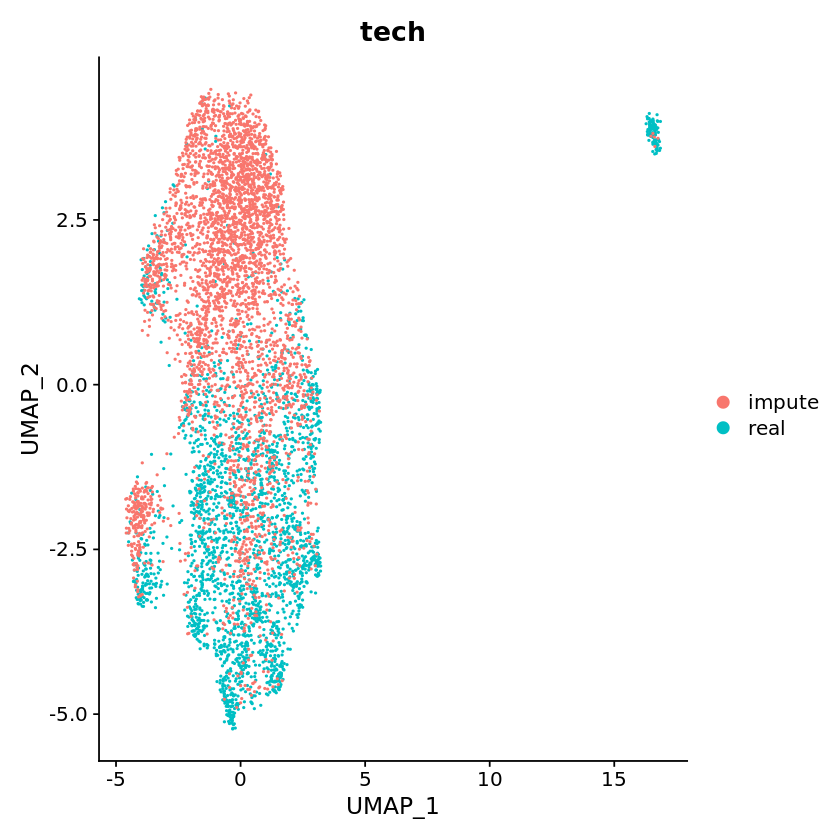

In [370]:
p1 <- DimPlot(CombinedObj, reduction = "umap", group.by = "tech", repel = TRUE)
p1
# ggsave(file.path(paste0(CombinedObj@project.name, "_source.png")), p1, width=5, height=4)

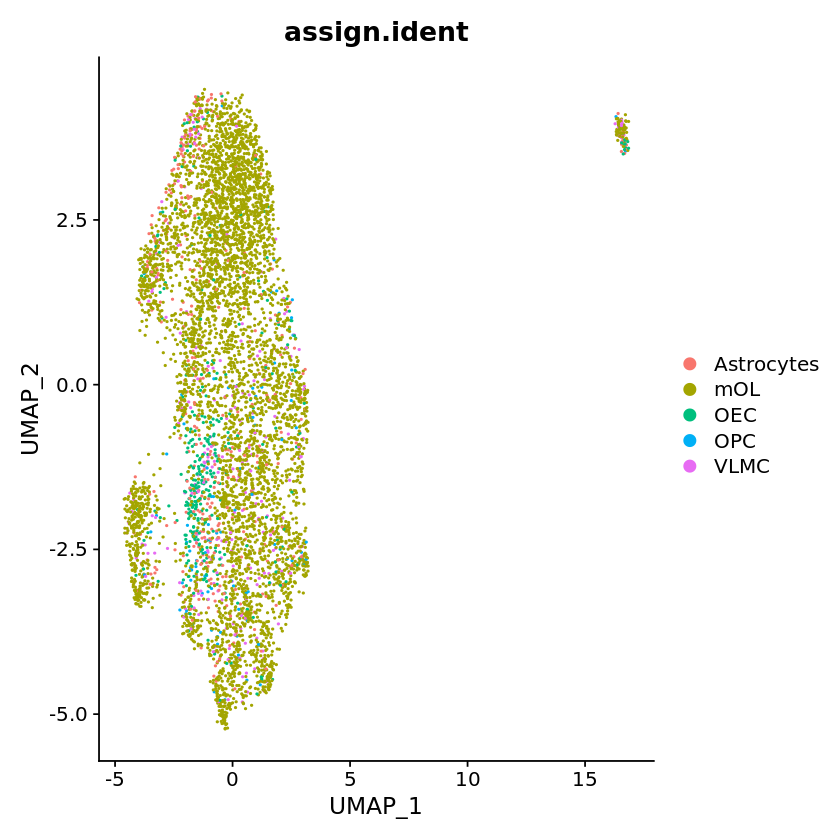

In [371]:
DimPlot(CombinedObj, reduction = "umap", group.by = "assign.ident", repel = TRUE)

Loading required package: Rcpp



In [ ]:
p2 <- DimPlot(CombinedObj, reduction = "umap", group.by = paste0("RNA_snn_res.", 0.6), cells = rownames(CombinedObj@meta.data[which(CombinedObj@meta.data[,'tech']=='RNA'),]), label = TRUE, repel = TRUE)
# ggsave(file.path(paste0(CombinedObj@project.name, "_RNAonly.png")), p2, width=5, height=4)
p2

In [ ]:
p3 <- DimPlot(CombinedObj, reduction = "umap", group.by = paste0("ATAC_snn_res.", ATAC.res), cells = rownames(CombinedObj@meta.data[which(CombinedObj@meta.data[,'tech']=='ATAC'),]), label = TRUE, repel = TRUE)
# ggsave(file.path(paste0(CombinedObj@project.name, "_ATAConly.png")), p3, width=5, height=4)
p4 <- DimPlot(object = CombinedObj, pt.size = 0.15, group.by = "assign.ident", label = TRUE, label.size = 3, repel = TRUE)
# ggsave(file.path(paste0(CombinedObj@project.name, "_annotated.png")), p4, width=6, height=4)

In [ ]:
celltype.predictions <- TransferData(anchorset = transfer.anchors, refdata = RNA$assign.ident, weight.reduction = ATAC[["lsi"]], dims = dims.use)
ATAC@meta.data$assign.ident <- celltype.predictions$predicted.id
ATAC@meta.data$prediction.score.max <- celltype.predictions$prediction.score.max

genes.use <- VariableFeatures(RNA)
refdata <- GetAssayData(RNA, assay = "RNA", slot = "data")[genes.use, ]
imputation <- TransferData(anchorset = transfer.anchors, refdata = refdata, weight.reduction = ATAC[["lsi"]], dims = dims.use)
ATAC[["RNA"]] <- imputation

CombinedObj <- merge(x = RNA, y = ATAC)
CombinedObj@project.name <- project
CombinedObj <- ScaleData(CombinedObj, features = genes.use, do.scale = FALSE)
CombinedObj <- RunPCA(CombinedObj, features = genes.use, verbose = FALSE)
CombinedObj <- RunUMAP(CombinedObj, dims = dims.use)



In [109]:
Incorporate <- function(RNA, ATAC, RPmatrix = NULL, project = "MAESTRO.coembedding", 
                        method = "MAESTRO", assembly = "GRCh38", frag.file,  min.c = 10,
                        dims.use = 1:30, RNA.res = 0.6, ATAC.res = 0.6)
{
  require(Seurat)
  ATAC$tech <- "ATAC"
  RNA$tech <- "RNA"
  
  if(is.null(ATAC[["ACTIVITY"]])&method!="Seurat"){
     RPmatrix <- RPmatrix[,intersect(colnames(ATAC), colnames(RPmatrix))]
     ATAC <- subset(ATAC, cells = intersect(colnames(ATAC), colnames(RPmatrix)))
     ATAC[["ACTIVITY"]] <- CreateAssayObject(counts = RPmatrix)
     DefaultAssay(ATAC) <- "ACTIVITY"
     ATAC <- FindVariableFeatures(ATAC)
     ATAC <- NormalizeData(ATAC)
     ATAC <- ScaleData(ATAC)
  }
  if(method=="Seurat"){
     peak.count = GetAssayData(ATAC, slot = "counts", assay = "ATAC")

     # add gene annotation information
     if (assembly == "GRCh38") {
       genome = "hg38"
       annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)
     }
     if (assembly == "GRCm38") {
       genome = "mm10"
       annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79)
     }
     seqlevelsStyle(annotations) <- "UCSC"
     genome(annotations) <- genome
     
     chrom_assay <- CreateChromatinAssay(
       counts = peak.count,
       sep = c("-", "-"),
       genome = genome,
       fragments = frag.file,
       min.cells = min.c,
       annotation = annotations
     )
     ATAC[["ATAC.chrom"]] <- chrom_assay
     DefaultAssay(ATAC) = "ATAC.chrom"
     Annotation(ATAC) <- annotations
     
     gene.activities <- GeneActivity(ATAC, assay = "ATAC.chrom")
     ATAC[["ACTIVITY"]] <- CreateAssayObject(counts = gene.activities)
     DefaultAssay(ATAC) <- "ACTIVITY"
     ATAC <- FindVariableFeatures(ATAC)
     ATAC <- NormalizeData(ATAC)
     ATAC <- ScaleData(ATAC)
  }

  DefaultAssay(ATAC) <- "ACTIVITY"
  transfer.anchors <- FindTransferAnchors(reference = RNA, query = ATAC, features = VariableFeatures(object = RNA), 
                      reference.assay = "RNA", query.assay = "ACTIVITY", reduction = "cca")
  celltype.predictions <- TransferData(anchorset = transfer.anchors, refdata = RNA$assign.ident, weight.reduction = ATAC[["lsi"]], dims = dims.use)
  ATAC@meta.data$assign.ident <- celltype.predictions$predicted.id
  ATAC@meta.data$prediction.score.max <- celltype.predictions$prediction.score.max

  genes.use <- VariableFeatures(RNA)
  refdata <- GetAssayData(RNA, assay = "RNA", slot = "data")[genes.use, ]
  imputation <- TransferData(anchorset = transfer.anchors, refdata = refdata, weight.reduction = ATAC[["lsi"]], dims = dims.use)
  ATAC[["RNA"]] <- imputation

  CombinedObj <- merge(x = RNA, y = ATAC)
  CombinedObj@project.name <- project
  CombinedObj <- ScaleData(CombinedObj, features = genes.use, do.scale = FALSE)
  CombinedObj <- RunPCA(CombinedObj, features = genes.use, verbose = FALSE)
  CombinedObj <- RunUMAP(CombinedObj, dims = dims.use)

  p1 <- DimPlot(CombinedObj, reduction = "umap", group.by = "tech", repel = TRUE)
  ggsave(file.path(paste0(CombinedObj@project.name, "_source.png")), p1, width=5, height=4)
  p2 <- DimPlot(CombinedObj, reduction = "umap", group.by = paste0("RNA_snn_res.", RNA.res), cells = rownames(CombinedObj@meta.data[which(CombinedObj@meta.data[,'tech']=='RNA'),]), label = TRUE, repel = TRUE)
  ggsave(file.path(paste0(CombinedObj@project.name, "_RNAonly.png")), p2, width=5, height=4)
  p3 <- DimPlot(CombinedObj, reduction = "umap", group.by = paste0("ATAC_snn_res.", ATAC.res), cells = rownames(CombinedObj@meta.data[which(CombinedObj@meta.data[,'tech']=='ATAC'),]), label = TRUE, repel = TRUE)
  ggsave(file.path(paste0(CombinedObj@project.name, "_ATAConly.png")), p3, width=5, height=4)
  p4 <- DimPlot(object = CombinedObj, pt.size = 0.15, group.by = "assign.ident", label = TRUE, label.size = 3, repel = TRUE)
  ggsave(file.path(paste0(CombinedObj@project.name, "_annotated.png")), p4, width=6, height=4)
  
  write.table(CombinedObj@meta.data, file.path(paste0(CombinedObj@project.name, "_metadata.tsv")), quote=F, sep="\t")
  return(list(ATAC = ATAC, CombinedObj = CombinedObj))
}



Warning message:
"package 'SeuratData' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [21]:
H3K27ac_real_SE <- as.SingleCellExperiment(H3K27ac_real, assay = 'peaks')

In [23]:
saveRDS(H3K27ac_real_SE, 'example/histone/peak_base/GSE157637_mouse_brain/H3K27ac_SingleCellExperiment.Rds')

In [7]:
H3K4me1_data = Read10X(H3K4me1_10x_mtx_path)

In [ ]:
H3K4me1.res <- ATACRunSeurat(inputMat = H3K4me1_data,
                                 project = "H3K4me1",
                                 min.c = 50,
                                 min.p = 500,
                                 method = "LSI",
                                 dims.use = 1:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = "example//histone//peak_base//H3K4me1/H3K4me1_analysis/")

In [44]:
H3K4me1.res$ATAC

An object of class Seurat 
81434 features across 10715 samples within 1 assay 
Active assay: ATAC (81434 features, 81434 variable features)
 2 dimensional reductions calculated: lsi, umap

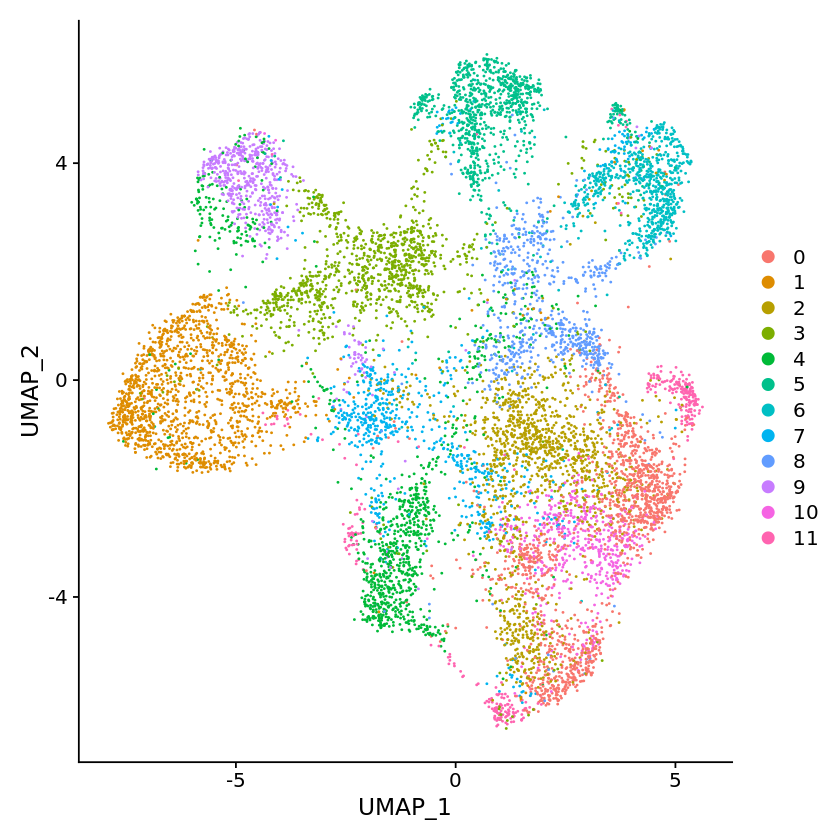

In [41]:
DimPlot(H3K4me1.res$ATAC)

In [26]:
H3K4me1_SE <- as.SingleCellExperiment(H3K4me1.res$ATAC)

saveRDS(H3K4me1_SE, 'example//histone//peak_base//H3K4me1/H3K4me1_analysis/H3K4me1_SE.rds')

In [115]:
imputated_data = Read10X('example/histone/peak_base/pairedseq/SCRIPT/imputation/mtx_imputed_H3K4me1/', gene.column = 1)

In [116]:
imputed.res <- ATACRunSeurat(inputMat = imputated_data,
                                 project = "ATAC",
                                 min.c = 5,
                                 min.p = 100,
                                 method = "LSI",
                                 dims.use = 2:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = "example//histone//peak_base//pairedseq/SCRIPT/imputation/H3K4me1_imputation_analysis")

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
LSI analysis ...

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

UMAP analysis ...

13:00:17 UMAP embedding parameters a = 0.9922 b = 1.112

13:00:17 Read 10551 rows and found 29 numeric columns

13:00:17 Using Annoy for neighbor search, n_neighbors = 30

13:00:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:00:18 Writing NN index file to temp file /tmp/RtmpqxOokN/file24e37e2b568bea

13:00:18 Searching Annoy index using 1 thread, search_k = 3000

13:00:21 Annoy recall = 100%

13:00:23 Commencing smooth kNN distance calibration using 1 thread

13:00:25 Initializing from normalized Laplacian + noise

13:00:26 Commencing optimization for 200 epochs, wi

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10551
Number of edges: 314154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8262
Number of communities: 12
Elapsed time: 1 seconds


Identify cluster specific peaks ...



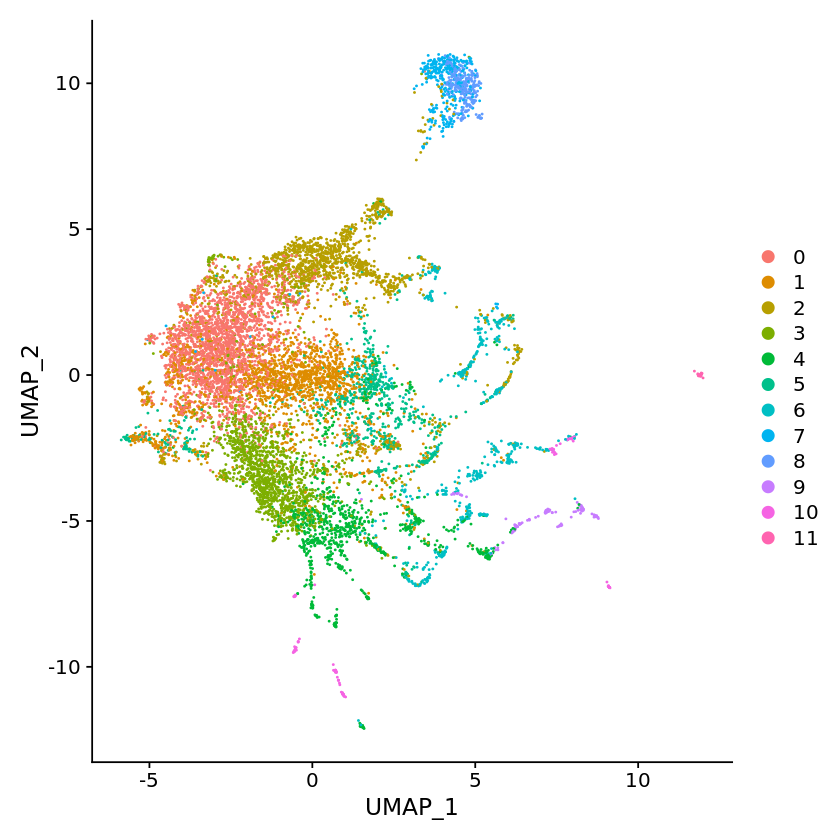

In [117]:
DimPlot(imputed.res$ATAC)

In [118]:
H3K4me1_SE <- as.SingleCellExperiment(imputed.res$ATAC)

saveRDS(H3K4me1_SE, 'example//histone//peak_base/pairedseq/SCRIPT/imputation//H3K4me1_imputation_analysis/H3K4me1_imputation_SE.rds')

In [79]:
H3K4me1_SE

class: SingleCellExperiment 
dim: 6978 10452 
metadata(0):
assays(2): counts logcounts
rownames(6978): chr10-100487238-100488119 chr10-100588810-100589428 ...
  chrY-11857986-11858368 chrY-258943-259524
rowData names(0):
colnames(10452): 51:02:14:09 51:02:14:12 ... 56:96:93:04 56:96:94:09
colData names(6): orig.ident nCount_ATAC ... seurat_clusters ident
reducedDimNames(2): LSI UMAP
altExpNames(0):

In [ ]:
H3K4me1.res

In [13]:
H3K27ac_data = Read10X(H3K27ac_10x_mtx_path)

In [ ]:
H3K27ac.res <- ATACRunSeurat(inputMat = H3K27ac_data,
                                 project = "H3K27ac",
                                 min.c = 50,
                                 min.p = 500,
                                 method = "LSI",
                                 dims.use = 1:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = "example//histone//peak_base//H3K27ac/H3K27ac_analysis/")

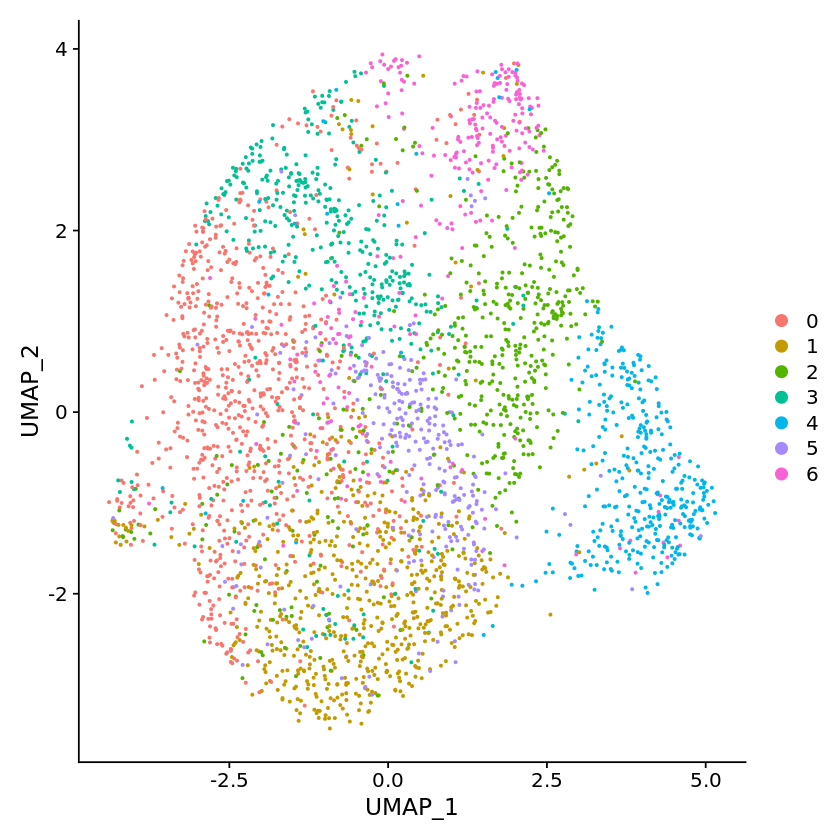

In [40]:
DimPlot(H3K27ac.res$ATAC)

In [27]:
H3K27ac_SE <- as.SingleCellExperiment(H3K27ac.res$ATAC)

saveRDS(H3K27ac_SE, 'example//histone//peak_base//H3K27ac/H3K27ac_analysis/H3K27ac_SE.rds')

# Cut&Tag Pro

## PBMC H3K27ac

In [397]:
h3k27ac_pbmc <- readRDS('example/histone/peak_base/cuttagpro/H3K27ac.rds')

In [7]:
h3k27ac_pbmc@meta.data$predicted.celltype.

[1] "Mono"    "Mono"    "Mono"    "CD8 T"   "Mono"    "Mono"    "Mono"   
    [8] "B"       "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [15] "Mono"    "B"       "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [22] "B"       "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [29] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [36] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [43] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [50] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "B"      
   [57] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [64] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [71] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [78] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [85] "Mono"    "Mono"    "Mono"    "B"       "Mono"    "Mono"    "Mono"   
   [92] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
   [99] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [106] "B"       "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [113] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [120] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "CD8 T"  
  [127] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [134] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [141] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [148] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [155] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [162] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [169] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [176] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "B"       "Mono"   
  [183] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [190] "Mono"    "Mono"    "B"       "Mono"    "Mono"    "Mono"    "Mono"   
  [197] "NK"      "Mono"    "Mono"    "CD4 T"   "Mono"    "B"       "Mono"   
  [204] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [211] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [218] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [225] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [232] "CD4 T"   "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [239] "CD4 T"   "B"       "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [246] "Mono"    "Mono"    "Mono"    "B"       "Mono"    "Mono"    "Mono"   
  [253] "Mono"    "Mono"    "other"   "Mono"    "Mono"    "Mono"    "Mono"   
  [260] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [267] "Mono"    "Mono"    "Mono"    "B"       "Mono"    "Mono"    "other T"
  [274] "CD4 T"   "DC"      "other T" "Mono"    "Mono"    "Mono"    "Mono"   
  [281] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [288] "Mono"    "Mono"    "B"       "Mono"    "Mono"    "Mono"    "Mono"   
  [295] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [302] "Mono"    "CD4 T"   "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [309] "Mono"    "CD4 T"   "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [316] "Mono"    "NK"      "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [323] "Mono"    "Mono"    "DC"      "Mono"    "Mono"    "Mono"    "Mono"   
  [330] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "CD4 T"  
  [337] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [344] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [351] "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"    "Mono"   
  [358] "Mono"    "Mono"  

In [10]:
colnames(h3k27ac_pbmc@meta.data)

[1] "orig.ident"                  "nCount_ADT"                 
 [3] "nFeature_ADT"                "nCount_HTO"                 
 [5] "nFeature_HTO"                "HTO_maxID"                  
 [7] "HTO_secondID"                "HTO_margin"                 
 [9] "HTO_classification"          "HTO_classification.global"  
[11] "hash.ID"                     "ADT_snn_res.0.5"            
[13] "seurat_clusters"             "nCount_tiles"               
[15] "nFeature_tiles"              "tiles_snn_res.0.8"          
[17] "predicted.celltype.l1.score" "predicted.celltype.l1"      
[19] "predicted.celltype.l2.score" "predicted.celltype.l2"      
[21] "predicted.celltype.l3.score" "predicted.celltype.l3"      
[23] "hand_cell"                   "tiles.weight"               
[25] "ADT.weight"                  "wsnn_res.0.3"               
[27] "cellID"                      "batch"                      
[29] "integrated.weight"

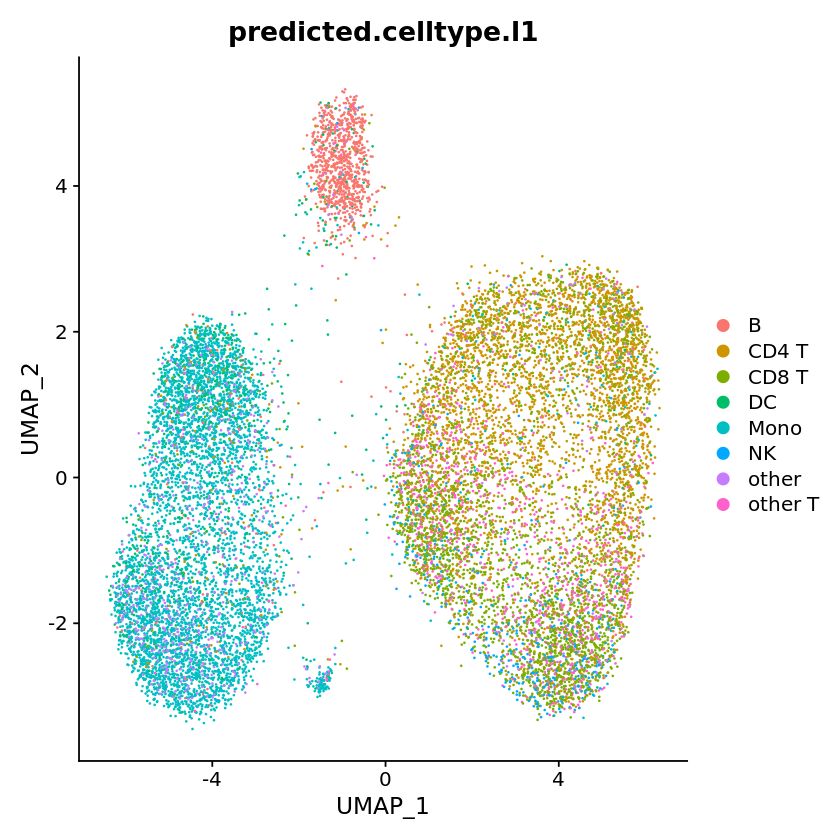

In [16]:
DimPlot(h3k27ac_pbmc, group.by = 'predicted.celltype.l1')

In [456]:
h3k27ac_pbmc@meta.data['predicted.celltype.l1']

predicted.celltype.l1
AACCTTTTCGTCCCTA-1 Mono                 
TGGAAGGAGTGTCACT-1 Mono                 
GTTATTCTCCAAACCA-1 Mono                 
GCCATAAGTATCATGC-1 CD8 T                
CCCTAACTCTACTGCC-1 Mono                 
GCATTCCTCCATTGTT-1 Mono                 
AACCTTTAGTACAGTA-1 Mono                 
AAAGGATTCGCTTCAC-1 B                    
TTAGCTTTCGATTACG-1 Mono                 
TGTTAGGTCCCACTTG-1 Mono                 
AGCTATGGTGTCTACA-1 Mono                 
GTGACATTCAGCACTA-1 Mono                 
ACCTGCTTCTTATCAC-1 Mono                 
TTGCACCTCTGGTACA-1 Mono                 
GTCGTAAGTTACGCTA-1 Mono                 
AACCTTTAGCTAACAA-1 B                    
CCAGATAGTTTGTACG-1 Mono                 
CTAACTTAGGGTCCCT-1 Mono                 
TTGTCTACATTTCTTG-1 Mono                 
CTTGAAGTCTGTTGCC-1 Mono                 
CATAACGAGACACAAT-1 Mono                 
GACTAACAGTACAACA-1 B                    
TGGAAGGCACTGTAAC-1 Mono                 
ACCAAACAGACGTCAG-1 Mono                 
ACAGAAAAGAACTAAC-1 Mono                 
AGTCAACCACCCTTAC-1 Mono                 
TCCAGAATCCTCCAGT-1 Mono                 
TAGGTCAAGAAAGGGT-1 Mono                 
CCAATGAAGCAATAAC-1 Mono                 
GCAGATTGTATACGCT-1 Mono                 
⋮                  ⋮                    
TTAGGTGCAAATGTCC-2 other                
CTAACTTCAGCAACGA-2 other                
CTTCCAGGTAGCCATT-2 other                
GTAATCGCATCGACGC-2 other                
AGCTATGCATGGAGGT-2 other                
GCGTAGCAGCGATACG-2 other                
CAGTGCGAGAGAGGTA-2 other                
ACTACCCGTTAACCAC-2 other                
AACGTACGTCTGGTCG-2 other                
TGCATGATCCTGGGAC-2 other                
GTGTCAATCTTAAGCG-2 other                
AATGCCAGTCCAAGTT-2 other                
AACCAACAGACCATAA-2 other                
CCCAGAGGTTGGTAAA-2 other                
ATGTTTCAGTGTCCCG-2 other                
TACAGCAGTGCTTTGA-2 other                
CATTCATTCTGTTGCC-2 other                
GCAACCGGTCCGTCGA-2 other                
TTACGTTAGTTGGAAT-2 other                
AGACAAAAGAACGTCG-2 other                
CTAGGATCAGATTTGC-2 other                
GCAAAGGCAAAGAGAG-2 other                
AGTCAACGTAATGCCT-2 other                
GATCATGTCTGTGTCC-2 other                
CGCAATATCCCGTAGG-2 other                
CTCTCAGTCAAGTTGC-2 other                
TAGCCCTGTACGGATG-2 other                
GCAACCGTCTGAAAGA-2 other                
TTCAACTGTTCTTATC-2 other                
CTGCTCAAGTATACCC-2 other

In [439]:
h3k27ac_count <- Read10X_h5('example/histone/peak_base/cuttagpro/MAESTRO/10x-genomics_peak_count.h5')

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' has been deprecated; setting 'repr = "T"' for you"


In [449]:
dim(h3k27ac_count)

[1] 49278 15827

In [450]:
H3K27ac.peak.res <- ATACRunSeurat(inputMat = h3k27ac_count,
                                 project = "H3K27ac",
                                 min.c = 10,
                                 min.p = 100,
                                 method = "LSI",
                                 dims.use = 1:30,
                                 cluster.res = 0.6,
                                 only.pos = TRUE,
                                 peaks.test.use = "presto",
                                 peaks.cutoff = 1e-05,
                                 peaks.pct = 0.1,
                                 peaks.logfc = 0.2,
                                 outdir = "example//histone//peak_base//cuttagpro//peak_H3K27ac_analysis/")

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
LSI analysis ...

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

UMAP analysis ...

21:59:53 UMAP embedding parameters a = 0.9922 b = 1.112

21:59:53 Read 10331 rows and found 30 numeric columns

21:59:53 Using Annoy for neighbor search, n_neighbors = 30

21:59:53 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:59:54 Writing NN index file to temp file /tmp/RtmphIeEiC/file3e3ae365219c16

21:59:54 Searching Annoy index using 1 thread, search_k = 3000

21:59:57 Annoy recall = 100%

21:59:59 Commencing smooth kNN distance calibration using 1 thread

22:00:02 Initializing from normalized Laplacian + noise

22:00:02 Commencing optimization for 200 epochs, wi

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10331
Number of edges: 301040

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7975
Number of communities: 7
Elapsed time: 1 seconds


Identify cluster specific peaks ...



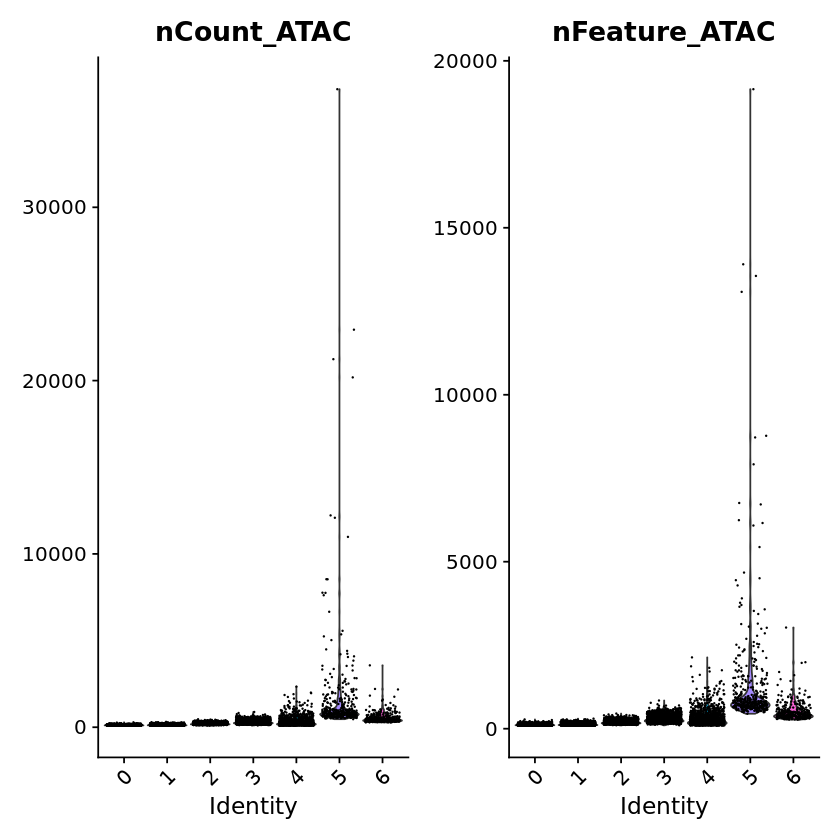

In [476]:
VlnPlot(H3K27ac.peak.res$ATAC, features = c("nCount_ATAC", 'nFeature_ATAC'), ncol = 2)

In [ ]:
H3K27ac.peak.res$ATAC@meta.data

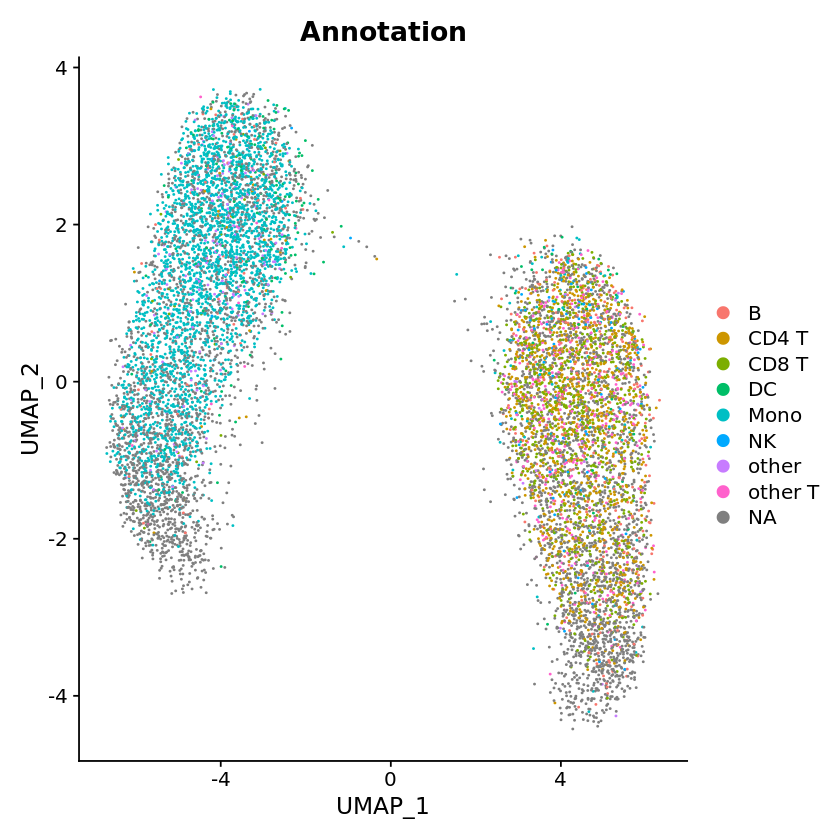

In [463]:
DimPlot(H3K27ac.peak.res$ATAC, group.by = 'Annotation')

In [466]:
H3K27ac.peak.res$ATAC@meta.data

orig.ident nCount_ATAC nFeature_ATAC ATAC_snn_res.0.6
TGCCTGTGTTTCACCC-2 H3K27ac      151         151         1               
GCATGATTCGTGCTTC-1 H3K27ac     3360        3022         5               
CCCTCTCCAATCCATG-2 H3K27ac      281         276         2               
AGTTACGCAAGGGTAC-1 H3K27ac      119         117         1               
TTACTCAGTAGGGTCA-1 H3K27ac      748         724         5               
TGGTCAAAGGTCTTGT-1 H3K27ac      355         351         3               
AATGGAAAGGCTTAAA-1 H3K27ac     7761        6159         5               
CATAACGAGGTCTTGT-1 H3K27ac      573         556         5               
TACAGCAAGGTCGTTT-1 H3K27ac      144         142         1               
CGCACAGCACCTCGTT-1 H3K27ac      105         105         0               
ATATTCCGTCCCGTGA-1 H3K27ac     8540        6759         5               
GGCATTAAGCGATACG-1 H3K27ac      424         415         3               
TTGCGAACAGTCCTGG-1 H3K27ac    36815       19150         5               
AGACAAAAGAAACGCC-1 H3K27ac     6661        5439         5               
AGTCAACCATCACAGT-1 H3K27ac     1849        1707         5               
ATATTCCGTCCCGTGA-2 H3K27ac      119         119         3               
ACAGAAAAGAACTAAC-1 H3K27ac      781         735         5               
CAAGCTAAGGAATGGA-1 H3K27ac      518         503         3               
GCTCACTTCTTACGGA-1 H3K27ac      722         684         4               
TGAGTCAAGTTCCAGT-2 H3K27ac      101         101         0               
GGTTGCGTCCCTATTA-1 H3K27ac     5026        4290         5               
GTCGTAAGTAGCATGG-2 H3K27ac      135         134         2               
GAAACAACAGCACATT-1 H3K27ac      142         136         2               
CTCATGCCAATGCCAT-1 H3K27ac      515         498         3               
ATCGAGTTCGATCTTT-2 H3K27ac      221         216         3               
TGTAAGCCATAGAATG-1 H3K27ac      290         285         3               
GCATTGATCCATAACG-1 H3K27ac      697         667         5               
ACGTTAGCAAGCAATA-1 H3K27ac      817         781         5               
ACCATCCGTGGAGTGT-1 H3K27ac     1000         954         5               
ATCGAGTAGGGTCCCT-1 H3K27ac      544         530         4               
⋮                  ⋮          ⋮           ⋮             ⋮               
TGGGTTACAATGGCAG-1 H3K27ac    138         138           2               
CGGACCAGTCAGGTGA-2 H3K27ac    134         133           1               
CTCTACGAGTTAGCAA-1 H3K27ac    128         127           0               
TCACTCGTCACACGTA-1 H3K27ac    104          99           0               
ATCGAGTCATCATGTG-2 H3K27ac    114         112           1               
CGTTCCAGTCCACCAG-1 H3K27ac    119         118           2               
GCTTTCGGTTAACCAC-2 H3K27ac    108         107           0               
TAGCCCTGTGCTTACA-1 H3K27ac    169         165           4               
TAGCGGCCACCTATTT-2 H3K27ac    140         137           4               
ATCGAGTAGCACACCC-2 H3K27ac    112         110           1               
CTTAATCAGGCGATTG-1 H3K27ac    117         115           0               
TCACTCGCAGAATGCG-2 H3K27ac    108         105           1               
CAAAGCTTCCATTGAG-1 H3K27ac    102         101           0               
TTGGTCCAGTTGGAAT-1 H3K27ac    114         111           0               
AAACTGCTCTATCCTA-1 H3K27ac    128         125           0               
TGCTCACCATGTGGGA-1 H3K27ac    119         116           2               
AACAAAGCACCGATCG-1 H3K27ac    161         156           2               
TCAATTCGTCATCGTA-1 H3K27ac    106         105           0               
TGGCGCAGTAAGCCGA-2 H3K27ac    106         104           0               
TCAAGGTCAAGGCTTT-1 H3K27ac    120         120           0               
CCTATTACATGCGCTG-1 H3K27ac    100          98           0               
TCAAGCAAGAGCGGTT-1 H3K27ac    115         113           1               
TTGTCTATCTCTATCA-1 H3K27ac     99          99           0               
AGGC

In [459]:
h3k27ac_pbmc@meta.data['predicted.celltype.l1'][rownames(H3K27ac.peak.res$ATAC@meta.data),]

[1] "Mono"    NA        NA        "Mono"    NA        NA        NA       
    [8] NA        NA        "CD4 T"   NA        "CD4 T"   NA        NA       
   [15] NA        NA        "Mono"    "Mono"    NA        NA        NA       
   [22] "other T" "other T" NA        NA        NA        "Mono"    NA       
   [29] NA        NA        NA        NA        "CD4 T"   NA        NA       
   [36] NA        "CD4 T"   NA        NA        NA        NA        "Mono"   
   [43] "CD4 T"   NA        "CD4 T"   NA        "DC"      "CD4 T"   NA       
   [50] NA        NA        "Mono"    NA        NA        "CD4 T"   "CD4 T"  
   [57] NA        NA        "DC"      NA        NA        NA        "other"  
   [64] "Mono"    "CD4 T"   "Mono"    NA        NA        "Mono"    "CD4 T"  
   [71] "Mono"    "Mono"    NA        NA        NA        NA        NA       
   [78] NA        NA        NA        NA        "Mono"    NA        NA       
   [85] NA        "Mono"    NA        "Mono"    "Mono"    NA        NA       
   [92] NA        NA        "Mono"    NA        NA        "CD4 T"   NA       
   [99] "Mono"    "Mono"    "Mono"    "Mono"    NA        NA        "CD4 T"  
  [106] "Mono"    NA        "Mono"    "Mono"    NA        "Mono"    NA       
  [113] "Mono"    "Mono"    "Mono"    NA        "Mono"    NA        "Mono"   
  [120] "Mono"    "Mono"    NA        "CD8 T"   NA        NA        "other"  
  [127] NA        "Mono"    "Mono"    NA        NA        NA        NA       
  [134] NA        NA        "Mono"    NA        "Mono"    NA        "Mono"   
  [141] NA        NA        NA        "Mono"    NA        "Mono"    NA       
  [148] "Mono"    NA        "Mono"    NA        NA        NA        NA       
  [155] "Mono"    "Mono"    NA        "B"       "Mono"    "CD4 T"   "CD4 T"  
  [162] NA        NA        NA        NA        "Mono"    NA        NA       
  [169] NA        "Mono"    NA        NA        NA        "Mono"    NA       
  [176] "Mono"    "Mono"    "Mono"    NA        NA        NA        "Mono"   
  [183] NA        "Mono"    NA        "Mono"    NA        NA        NA       
  [190] "CD4 T"   "Mono"    NA        NA        "B"       NA        NA       
  [197] "CD4 T"   "Mono"    NA        NA        NA        NA        NA       
  [204] NA        "Mono"    "other T" "Mono"    "Mono"    NA        "Mono"   
  [211] NA        NA        "DC"      "Mono"    NA        NA        "Mono"   
  [218] NA        NA        "Mono"    NA        "CD8 T"   "Mono"    "Mono"   
  [225] "Mono"    NA        NA        NA        NA        "CD4 T"   NA       
  [232] NA        NA        NA        NA        NA        NA        NA       
  [239] "Mono"    NA        NA        "CD4 T"   "Mono"    NA        NA       
  [246] "CD4 T"   "CD8 T"   "CD4 T"   "CD8 T"   "CD4 T"   NA        NA       
  [253] NA        NA        "CD4 T"   NA        "other T" NA        "CD4 T"  
  [260] NA        NA        "Mono"    NA        "other"   NA        NA       
  [267] "Mono"    NA        "NK"      "other T" NA        NA        "CD4 T"  
  [274] NA        "B"       NA        NA        "DC"      NA        NA       
  [281] "CD8 T"   "Mono"    "Mono"    NA        "Mono"    "Mono"    NA       
  [288] "Mono"    NA        NA        "Mono"    NA        NA        "CD4 T"  
  [295] "B"       "Mono"    NA        "CD4 T"   NA        NA        NA       
  [302] "CD8 T"   NA        NA        "B"       NA        "CD8 T"   "Mono"   
  [309] "Mono"    "Mono"    "Mono"    NA        NA        "CD8 T"   NA       
  [316] NA        NA        NA        NA        "DC"      NA        NA       
  [323] NA        "Mono"    NA        "other T" NA        "Mono"    NA       
  [330] NA        "CD4 T"   "Mono"    "CD4 T"   "Mono"    NA        NA       
  [337] NA        "B"       NA        NA        "Mono"    NA        NA       
  [344] "CD4 T"   "CD4 T"   "Mono"    NA        "Mono"    NA        "CD4 T"  
  [351] NA        "NK"      NA        "Mono"    "Mono"    NA        "CD4 T"  
  [358] NA        "B"     

In [462]:
H3K27ac.peak.res$ATAC@meta.data$Annotation = h3k27ac_pbmc@meta.data['predicted.celltype.l1'][rownames(H3K27ac.peak.res$ATAC@meta.data),]